In [2]:
"""
  Libraries
"""
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad
import sympy
from sympy import diff, symbols
import pandas as pd

Q1.

    Number of multiplication operations for multiplying (NxK) and (KxM) matrices = NxKxM
    Number of addition operations for multiplying (NxK) and (KxM) matrices = Nx(K-1)xM

Explaination - 

a)  Multiplication -

    No of multiplications of each element of the result matrix = K
    The size of output matrix = NxM
    So, number of multiplications = NxKxM

(b) Addition - 

    No of additions of each row of the result matrix = (K-1)xM
    No of rows in result matrix = N
    So, number of additions = Nx(K-1)xM

In [ ]:
"""
  Q2.
  Creating two Matrices for Comparing Speed
"""
n = 1000
k = 100
m = 100

mat1 = np.random.uniform(-10, 10, (n,k))
mat2 = np.random.uniform(-20, 20, (k,m))

In [ ]:
"""
  (a) Using list of lists-
"""
"""
(If you want Input)
n = int(input())
k = int(input())
m = int(input())
mat1 = []
for i in range(n):
    l = [int(x) for x in input().split()]
    mat1.append(l)

mat2 = []
for i in range(k):
    l = [int(x) for x in input().split()]
    mat2.append(l)
"""

mat3 = []
for i in range(n):
    l = []
    for j in range(m):
        sum = 0
        for x in range(k):
            sum += mat1[i][x] * mat2[x][j]
        l.append(sum)
    mat3.append(l)
    
print(mat3)

In [ ]:
"""
  (b) Using Numpy
"""

np.matmul(mat1, mat2)

array([[   65.1031736 ,  -120.71228372,   287.67185995, ...,
          391.6112152 ,  -508.89625186,   598.00225841],
       [  710.99708078,   511.41277073,  -368.34347876, ...,
         1170.59790843,  1233.80573729,  -484.6151549 ],
       [  513.82082922,   687.7423605 ,   157.14706211, ...,
        -1067.84858504,   784.76224779,   174.95070956],
       ...,
       [  356.74236363,   551.14289749,   223.83675031, ...,
         -764.9641663 ,    -6.04812259,     9.92403763],
       [-1357.14972393,  -156.89340173,   602.30137066, ...,
          701.24024306,   549.36224201,  -159.30206107],
       [ 1031.99610593,  -273.34729534,  -218.71638787, ...,
          201.19642656,  -357.04149204,  -350.64592279]])

With n = 1000, k = 100, m = 100:

Our method takes 9s, while the numpy.matmul computes the multiplication in 0s.

Time compexity for our method is $O(n^3)$, which is way worse than numpy.matmul.

In [ ]:
"""
  Q3.
  Using Method 1
"""
l = [int(x) for x in input().split()]
n = len(l)
med = 0
if(n%2 == 1):
  for j in range(n//2 + 1):
    max = l[0]
    for i in l:
      if(i > max):
        max = i
    if(j == n//2):
      med = max
    l.remove(max)
if(n%2 == 0):
  for j in range(n//2 + 1):
    max = l[0]
    for i in l:
      if(i > max):
        max = i
    if(j == n//2 - 1 or j == n//2):
      med += max
    l.remove(max)
  med /= 2
print(med)      

2 5 46 46  878 76 565 6
46.0


In [ ]:
"""
  Using Method 2
"""
l = [int(x) for x in input().split()]
n = len(l)
l.sort()
med = 0
if(n%2 == 1):
  med = l[n//2]
else:
  med = (l[n//2 - 1] + l[n//2]) / 2
print(med)

3 59 48 6 568 65 3 535 89
59


In [ ]:
"""
  Using Numpy
"""
arr = np.array([3, 59, 48, 6, 568, 65, 3, 535, 89])
np.median(arr)

59.0

Time complexity for Method1 is $ O(n^2)$

Time complexity for Method2 is $O(n\;log(n))$

Time complexity for numpy.median is $O(n)$



Q4. 

$ f = x^2y + y^3sin(x)$

$\nabla f = (2xy + y^3cos(x))\:\hat{x}\;+\; (x^2 + 3y^2sin(x))\:\hat{y}$

In [ ]:
#Q5.

def func(x):
  return x[0]**2 * x[1] + x[1]**3 * jnp.sin(x[0])

def Gradient(x):
  return [2 * x[0] * x[1] + x[1]**3 * np.cos(x[0]), x[0]**2 + 3 * x[1]**2 * np.sin(x[0])]

grad_Jax = grad(func)

input = np.array([[0.2, 0.3], [2.4, 3.6], [4.4, 2.1]])

for x in input:
  print(Gradient(x), grad_Jax(x), end = " ")
  print()

[0.14646179760171352, 0.09364071931466654] [0.1464618  0.09364072] 
[-17.123841192292353, 32.02200845982875] [-17.123838  32.022003] 
[15.633790291129863, 6.770304562441705] [15.633791   6.7703066] 


In [ ]:
#Q6.

def gradient_sym(f, coord):
  return [diff(f, C) for C in coord]

xy = x, y =  symbols('x y')
func = x**2 * y + y**3 * sympy.sin(x)

grd = gradient_sym(func, xy)
print(grd)

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


In [ ]:
#Q7.
db = {
    2022 : {
        "Branch1" : {
            "StudentX" : {
                "Roll no." : 1,
                "Name" : "X",
                "Marks" : {
                    "English" : 79,
                    "Maths" : 69,
                    "Computer" : 89
                }  
            },
            "StudentY" : {
                "Roll no." : 2,
                "Name" : "Y",
                "Marks" : {
                    "English" : 76,
                    "Maths" : 66,
                    "Computer" : 86
                }  
            },
            "StudentZ" : {
                "Roll no." : 3,
                "Name" : "Z",
                "Marks" : {
                    "English" : 49,
                    "Maths" : 64,
                    "Computer" : 84
                }  
            }
        },
        "Branch2" : {
            "StudentX" : {
                "Roll no." : 1,
                "Name" : "A",
                "Marks" : {
                    "English" : 71,
                    "Maths" : 61,
                    "Computer" : 81
                }  
            },
            "StudentY" : {
                "Roll no." : 2,
                "Name" : "B",
                "Marks" : {
                    "English" : 76,
                    "Maths" : 56,
                    "Computer" : 96
                }  
            },
            "StudentZ" : {
                "Roll no." : 3,
                "Name" : "C",
                "Marks" : {
                    "English" : 41,
                    "Maths" : 74,
                    "Computer" : 88
                }  
            }
        }
    },
        2023 : {
        "Branch1" : {
            "StudentX" : {
                "Roll no." : 1,
                "Name" : "L",
                "Marks" : {
                    "English" : 89,
                    "Maths" : 39,
                    "Computer" : 99
                }  
            },
            "StudentY" : {
                "Roll no." : 2,
                "Name" : "M",
                "Marks" : {
                    "English" : 86,
                    "Maths" : 66,
                    "Computer" : 96
                }  
            },
            "StudentZ" : {
                "Roll no." : 3,
                "Name" : "N",
                "Marks" : {
                    "English" : 49,
                    "Maths" : 69,
                    "Computer" : 94
                }  
            }
        },
        "Branch2" : {
            "StudentX" : {
                "Roll no." : 1,
                "Name" : "I",
                "Marks" : {
                    "English" : 51,
                    "Maths" : 41,
                    "Computer" : 81
                }  
            },
            "StudentY" : {
                "Roll no." : 2,
                "Name" : "J",
                "Marks" : {
                    "English" : 86,
                    "Maths" : 59,
                    "Computer" : 96
                }  
            },
            "StudentZ" : {
                "Roll no." : 3,
                "Name" : "K",
                "Marks" : {
                    "English" : 61,
                    "Maths" : 64,
                    "Computer" : 68
                }  
            }
        }
    }
}
print(db[2023]["Branch1"]["StudentY"]["Name"], db[2023]["Branch1"]["StudentY"]["Marks"]["Computer"], end = " ")

M 96 

In [ ]:
#Q8.
class Marks:
  def __init__(self, English, Maths, Computer):
    self.English = English
    self.Maths = Maths
    self.Computer = Computer
class Student():
  def __init__(self, Roll_no, Name, Marks):
    self.Roll_no = Roll_no
    self.Name = Name
    self.Marks = Marks
class Branch():
  def __init__(self, Branch_name, Student):
    self.Branch_name = Branch_name
    self.Student = Student
class Year():
  def __init__(self, Year, Branch):
    self.Year = Year
    self.Branch = Branch
    
M1 = Marks(76, 80, 92)
M2 = Marks(79, 100, 90)
M3 = Marks(69, 95, 48)
M4 = Marks(66, 75, 58)
M5 = Marks(59, 73, 61)

S1 = Student(1, "StudentX", M1)
S2 = Student(2, "StudentY", M2)
S3 = Student(1, "StudentA", M3)
S4 = Student(2, "StudentB", M4)
S5 = Student(1, "StudentI", M5)

B1 = Branch("Branch1", [S1, S2])
B2 = Branch("Branch2", [S3])
B3 = Branch("Branch3", [S4, S5])

Y1 = Year(2022, [B1, B2])
Y2 = Year(2023, [B3])

db = [Y1, Y2]

print(db[0].Year, db[0].Branch[1].Branch_name, db[0].Branch[1].Student[0].Name, db[0].Branch[1].Student[0].Marks.English, db[0].Branch[1].Student[0].Marks.Maths, db[0].Branch[1].Student[0].Marks.Computer, end = " ")

2022 Branch2 StudentA 69 95 48 

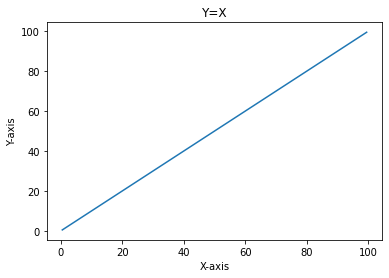

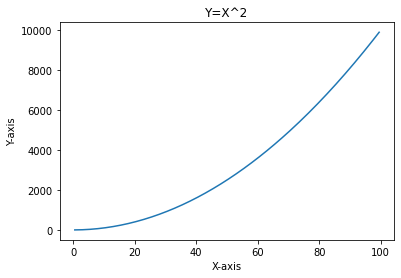

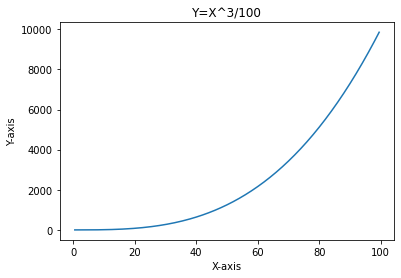

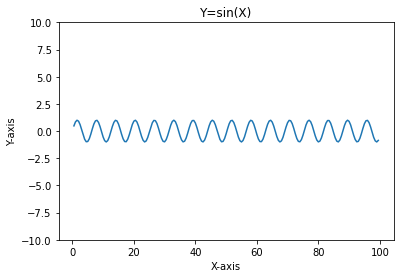

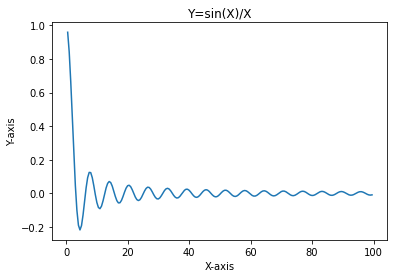

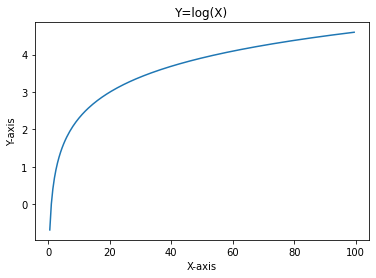

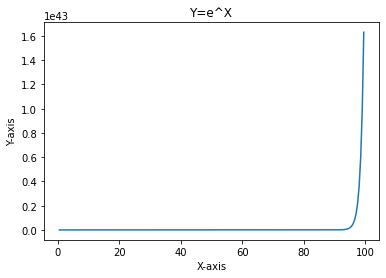

In [ ]:
#Q9.
x = np.arange(0.5, 100, 0.5)
y = np.array([n for n in x])
plt.plot(x, y)                       
plt.title('Y=X')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

y = np.array([n*n for n in x])
plt.plot(x, y)                      
plt.title('Y=X^2')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

y = np.array([n*n*n/100 for n in x])
plt.plot(x, y)                      
plt.title('Y=X^3/100')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

y = np.sin(x)
plt.plot(x, y)     
plt.ylim(-10, 10)                 
plt.title('Y=sin(X)')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

y = np.sin(x)/x
plt.plot(x, y)                   
plt.title('Y=sin(X)/X')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

y = np.log(x)
plt.plot(x, y)                      
plt.title('Y=log(X)')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

y = np.exp(x)
plt.plot(x, y)                      
plt.title('Y=e^X')          
plt.xlabel('X-axis')     
plt.ylabel('Y-axis')
plt.show() 

In [27]:
#Q10.
mat = np.random.uniform(1, 2, (20,5))
cols = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(data = mat, columns = cols)

max_sd = df["a"].std()
for i in range(1, 5):
  sd = df[cols[i]].std()
  l.append(sd)
  if(sd > max_sd):
    max_sd = sd
print(max_sd)

mean_df = df.mean(axis = 1)
min_mean = mean_df.min()
print(min_mean)

0.32206177399004776
1.3046974424729378


In [28]:
#Q11.
df["f"] = df.sum(axis = 1)
df["g"] = ["LT8" if x < 8 else "GT8" for x in df["f"]]
print(df)
print(len(df[df["g"] == "LT8"]))
lt_sd = df[df["g"] == "LT8"]["f"].std()
gt_sd = df[df["g"] == "GT8"]["f"].std()
print(lt_sd, gt_sd, end = " ")

           a         b         c         d         e         f    g
0   1.577415  1.673979  1.050036  1.557149  1.864022  7.722602  LT8
1   1.443835  1.133260  1.292188  1.640574  1.319749  6.829606  LT8
2   1.567476  1.621071  1.402359  1.892472  1.280031  7.763409  LT8
3   1.954623  1.811798  1.405906  1.837048  1.477424  8.486799  GT8
4   1.103029  1.209202  1.392396  1.598202  1.220658  6.523487  LT8
5   1.916592  1.637912  1.909413  1.202563  1.607156  8.273637  GT8
6   1.943197  1.680488  1.358456  1.102260  1.324637  7.409039  LT8
7   1.755739  1.544105  1.711087  1.209431  1.208579  7.428941  LT8
8   1.770389  1.566312  1.876079  1.979260  1.301886  8.493925  GT8
9   1.509686  1.830255  1.492179  1.405627  1.517505  7.755252  LT8
10  1.644643  1.323864  1.413297  1.778512  1.194061  7.354377  LT8
11  1.876051  1.330849  1.701108  1.644147  1.383523  7.935679  LT8
12  1.110904  1.347127  1.797954  1.261780  1.467022  6.984787  LT8
13  1.950430  1.827109  1.852169  1.028596  1.55

In [3]:
#Q12.
mat1 = np.random.uniform(0, 1, size = (4,1))
mat2 = np.random.uniform(0, 1, size = (1,3))
mat3 = mat1 + mat2
print("Matrix 1")
print(mat1)
print("Matrix 2")
print(mat2)
print("Matrix 3")
print(mat3)

Matrix 1
[[0.90680272]
 [0.90491787]
 [0.88217512]
 [0.48455048]]
Matrix 2
[[0.92265123 0.37514571 0.82564871]]
Matrix 3
[[1.82945395 1.28194843 1.73245143]
 [1.82756911 1.28006358 1.73056659]
 [1.80482635 1.25732082 1.70782383]
 [1.40720171 0.85969619 1.31019919]]


In [30]:

"""
  Q13.
  (a) Function for argmin (no axis specified)
"""
arr_min = np.array([[[1, 2, -2, 6], [4, 5, 6, -2]], [[7, 8, 0, -3], [-1, 11, 12, 10]]])
min = arr_min[0][0][0]
min_index = 0
shp = np.shape(arr_min)
for i in range(shp[0]):
  for j in range(shp[1]):
    for k in range(shp[2]):
      if(arr_min[i][j][k] < min):
        min = arr_min[i][j][k]
        min_index = i*shp[1]*shp[2] + j*shp[2] + k
print(min_index)

"""
  (b) Using Numpy function
"""
print(np.argmin(arr_min))



11
11


In [31]:
"""
  If the axis is specified
"""

arr_min = np.random.uniform(-100, 100, (3, 5, 4))

shp = np.shape(arr_min)

index = np.argmin(arr_min, axis = 1)
ax = int(input())

l = [shp[1] * shp[2], shp[2], 1]
l.pop(ax)
dim = len(shp)

argmin_shape = np.shape(arr_min)



tup_len = len(argmin_shape)
if(ax == tup_len - 1):
  argmin_shape = argmin_shape[:ax]
else:
  argmin_shape = argmin_shape[:ax] + argmin_shape[ax + 1:]


flat_array = arr_min.flatten()

stride = 1
for i in range(ax + 1, dim):
  stride *= shp[i]

span = shp[ax]

argmin_arr = []

print(stride, span)

for i in range(argmin_shape[0]):
  argmin_subarr = []
  for j in range(argmin_shape[1]):
    start_index = (i * l[0] + j * l[1])
    min_val = flat_array[start_index]
    min_index = 0
    #print(min_val)
    for k in range(span):
      if(flat_array[start_index + stride * k] < min_val):
        min_val = flat_array[start_index + stride * k]
        min_index = k
    argmin_subarr.append(min_index)
  argmin_arr.append(argmin_subarr)

  



print(arr_min)
print(argmin_arr)

"""
  Using Numpy function
"""

print(np.argmin(arr_min, axis = ax))

1
4 5
[[[-92.94253675 -37.94309928  43.82509458  66.76957162]
  [-10.90671185 -61.56100325  60.79301094 -77.7921223 ]
  [-74.92708617  13.67156401 -36.59999748 -31.31751129]
  [ 81.65882276  26.19747188 -31.68033693  54.98346644]
  [ 32.95786961  53.63881028  45.77711534 -87.76670761]]

 [[-36.696114    96.80310587  54.42110286  70.66527303]
  [ 92.89466102 -37.15676343 -23.00391729 -56.90086238]
  [ -4.94267059  73.09399281  10.43677853 -83.42056771]
  [-12.42429394 -92.28120352  71.17742579  76.08378916]
  [ 51.40831775  11.37230768   3.79276953 -45.14449593]]

 [[ 12.23231347 -90.65924551  83.02472385 -70.26837638]
  [ -8.69902869  -9.4861233   53.53536507 -33.61519262]
  [ 25.83877648 -34.83771006  -4.98988331  60.64761812]
  [-39.60400832 -69.78433343  81.26118387  73.56766553]
  [ -4.5950085   45.25489982 -27.17817696  41.35531619]]]
[[0, 1, 2, 4], [0, 3, 1, 2], [3, 0, 4, 0]]
[[0 1 2 4]
 [0 3 1 2]
 [3 0 4 0]]


In [26]:
"""
a = np.arange(6).reshape(2,3) + 10

print(a)
print(np.argmin(a, axis=0))
print(np.argmin(a, axis=1))
print(np.shape(a))
"""

'\na = np.arange(6).reshape(2,3) + 10\n\nprint(a)\nprint(np.argmin(a, axis=0))\nprint(np.argmin(a, axis=1))\nprint(np.shape(a))\n'